# GRIP - TSF | Data Science & Business Analytics Internship
## Task 3 : Exploratory Data Analysis - Retail


# 👉 LAGHROUBI MOHAMED 



## Importing all libraries required in this notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Get Data Shape and infos

In [3]:
print(f'data shape is {df.shape}')
df.info()

data shape is (9994, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Check for null values

In [4]:
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
for column in df.columns:
    if len(df[column].value_counts()) == 1 :
        print(df[column].value_counts())

United States    9994
Name: Country, dtype: int64


### Since all the data from the United States we can drop the Country and Postal Code Columns 

In [6]:
df.drop(columns=['Country' , 'Postal Code'] , inplace=True)
df

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


## Correlation 

<AxesSubplot:>

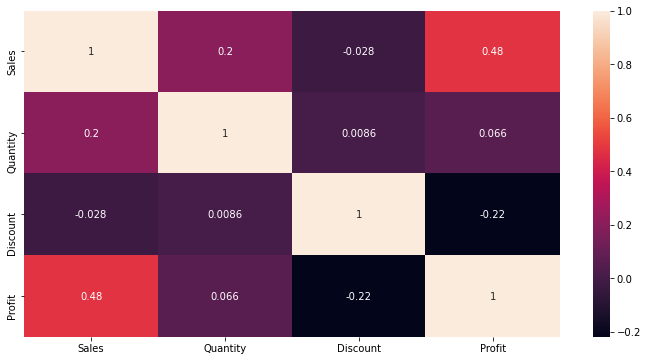

In [7]:
plt.figure(figsize=(12,6))
dfCor = df.corr()
sns.heatmap(dfCor , annot=True)

### From The correlation coefficients it's evident that the relation between variables is not strong enough.
* Relation between Discount and Sales are negatively correlated 
* Relation between Sales and Profit are netrually correlated 

## We can analyse the data further in 3 different ways
*  Sales ,Profit ,Discount Analysis at each Level
*  Product Category Level Analysis
*  Geographic Level Analysis

## Sales Vs Profit Vs Discount

### Based on Region

<AxesSubplot:xlabel='Region', ylabel='Discount'>

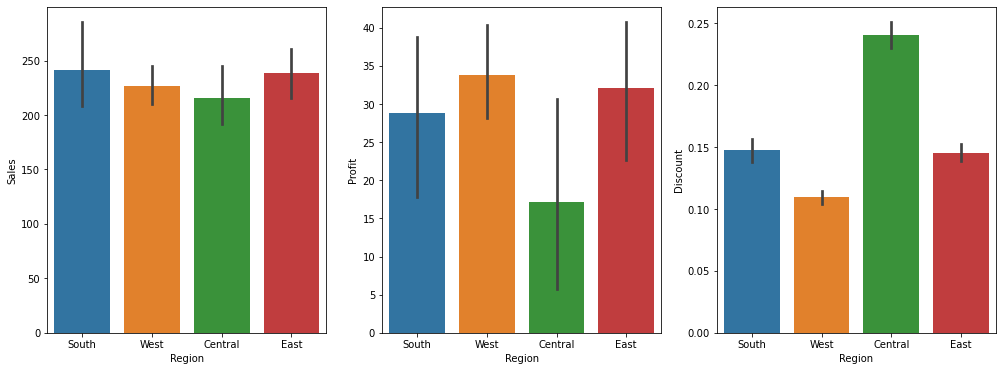

In [8]:
fig , ax = plt.subplots(1,3,figsize=(17,6))
sns.barplot(x='Region' , y= 'Sales', data=df , ax=ax[0] )
sns.barplot(x='Region' , y= 'Profit', data=df , ax=ax[1])
sns.barplot(x='Region' , y= 'Discount', data=df , ax=ax[2])
        

* Sales are higher in the South Region
* The Profit is higher in the West Region this may because of the hight Sales and Low Discounts
* Central region has higher Discounts 

### Based on Category

<AxesSubplot:xlabel='Category', ylabel='Discount'>

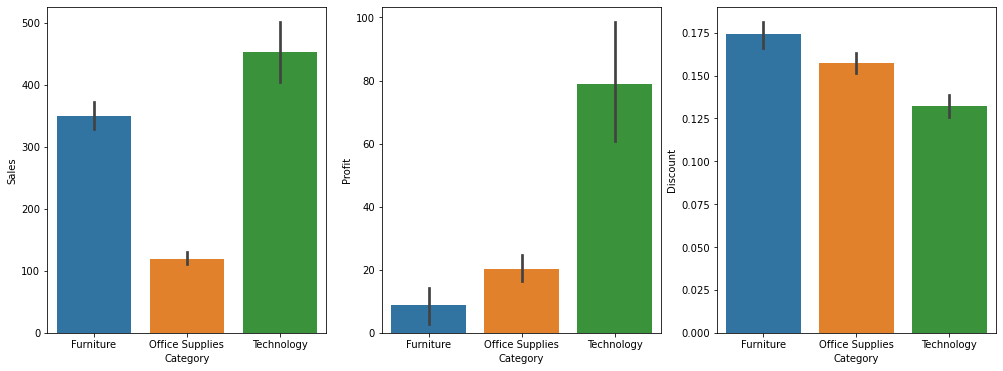

In [9]:
fig , ax = plt.subplots(1,3,figsize=(17,6))
sns.barplot(x='Category' , y= 'Sales', data=df , ax=ax[0] )
sns.barplot(x='Category' , y= 'Profit', data=df , ax=ax[1])
sns.barplot(x='Category' , y= 'Discount', data=df , ax=ax[2])
        

* Even with the low Discounts the Technology Category has the higher Sales and Profits


### Based on Segment

<AxesSubplot:xlabel='Segment', ylabel='Discount'>

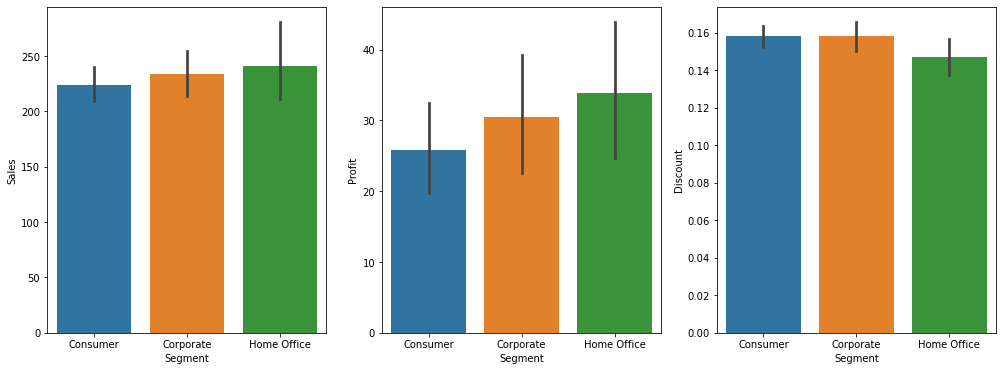

In [10]:
fig , ax = plt.subplots(1,3,figsize=(17,6))
sns.barplot(x='Segment' , y= 'Sales', data=df , ax=ax[0] )
sns.barplot(x='Segment' , y= 'Profit', data=df , ax=ax[1])
sns.barplot(x='Segment' , y= 'Discount', data=df , ax=ax[2])
        

### Based On Ship Mode

<AxesSubplot:xlabel='Ship Mode', ylabel='Discount'>

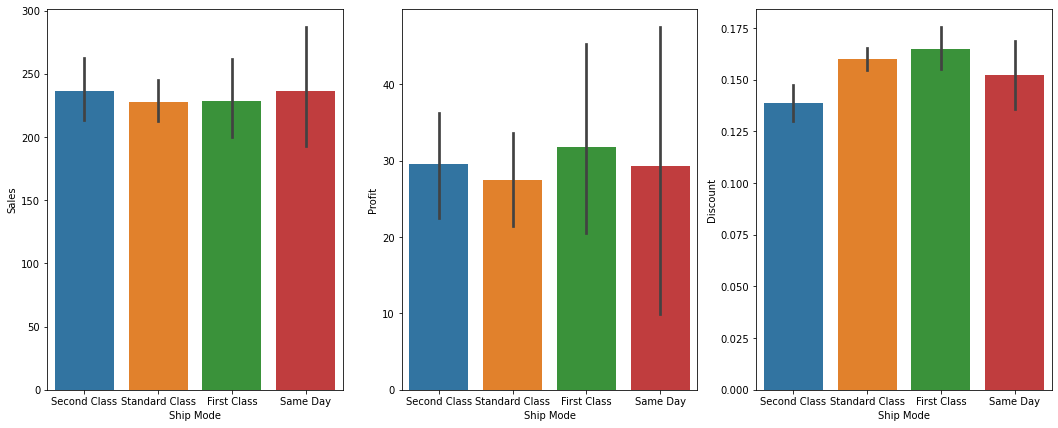

In [11]:
fig , ax = plt.subplots(1,3,figsize=(18,7))
sns.barplot(x='Ship Mode' , y= 'Sales', data=df , ax=ax[0] )
sns.barplot(x='Ship Mode' , y= 'Profit', data=df , ax=ax[1])
sns.barplot(x='Ship Mode' , y= 'Discount', data=df , ax=ax[2])


* Due to high discounts in first class , it has Maximum profits.

### Based on Quantity -Sales & Profit & Discount


<AxesSubplot:xlabel='Quantity', ylabel='Discount'>

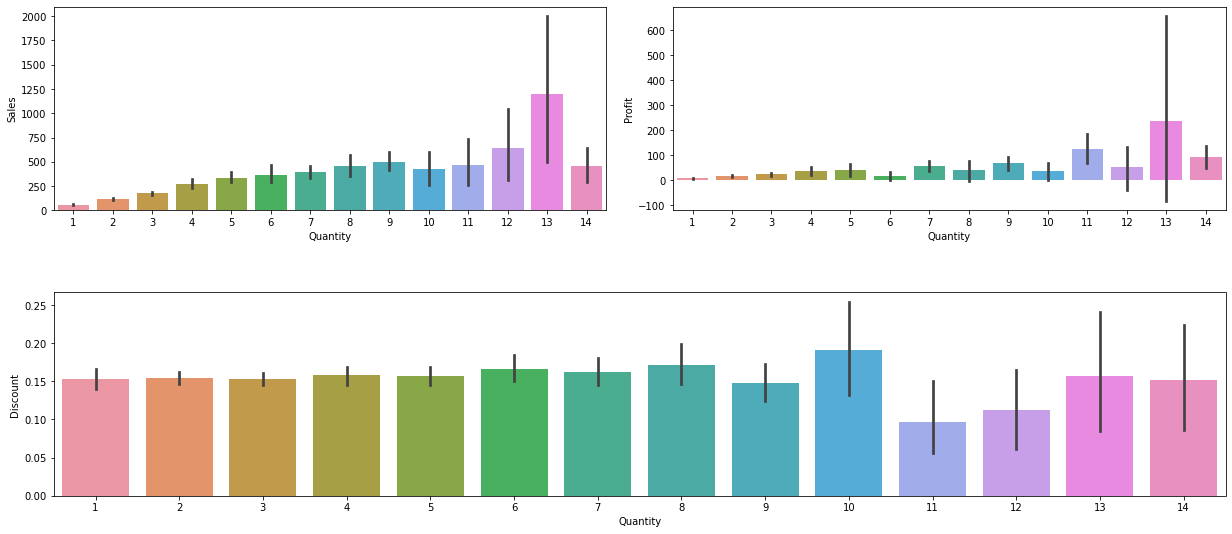

In [12]:
fig = plt.figure(figsize=(21,9))
fig.subplots_adjust(hspace=0.4, wspace=0.12)

ax = fig.add_subplot(221)
sns.barplot(x='Quantity' , y= 'Sales', data=df ,ax=ax)

ax = fig.add_subplot(222)
sns.barplot(x='Quantity' , y= 'Profit', data=df ,ax=ax)

ax = fig.add_subplot(212)
sns.barplot(x='Quantity' , y= 'Discount', data=df, ax=ax)

* 13 Number of Quantity is high for sales and Profit.
* But maximun discounts are given in #10



### Based on Discount -Sales & Profit


<AxesSubplot:xlabel='Discount', ylabel='Profit'>

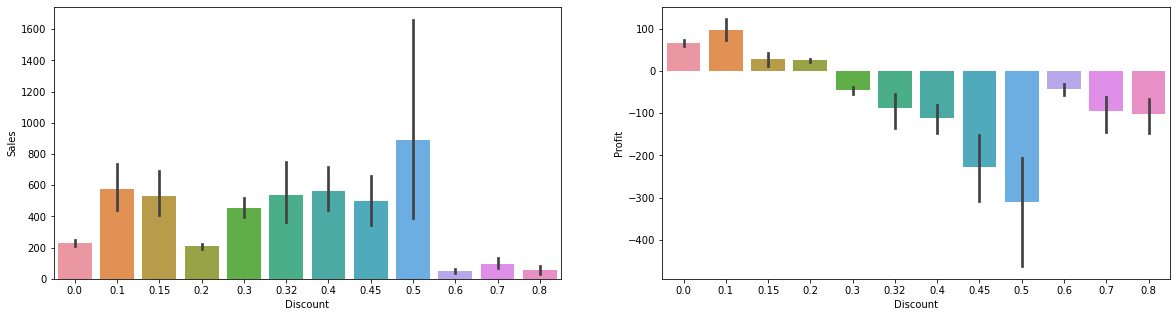

In [13]:
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.barplot(x='Discount', y='Sales', data = df,ax=ax[0])
sns.barplot(x='Discount', y='Profit', data = df)

* As the Discount is increasing the profits are going into negative. But the same trend can be observed with sales after 60% dicount rates.At 50% discount the sales are maximum

## Category Level Analysis

In [14]:
df['Category'].value_counts().index

Index(['Office Supplies', 'Furniture', 'Technology'], dtype='object')

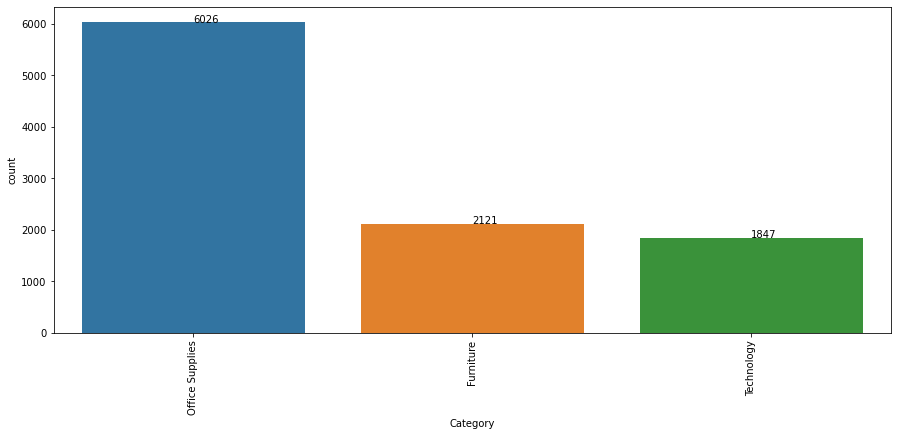

In [15]:
plt.close('all')
plt.figure(figsize=(15,6))
ax=sns.countplot(x = "Category", data = df , order=df['Category'].value_counts().index )
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))
plt.show()

* The count of office supplies sold is highest when compared to remaining categories


### Quantity in each Sub-Category


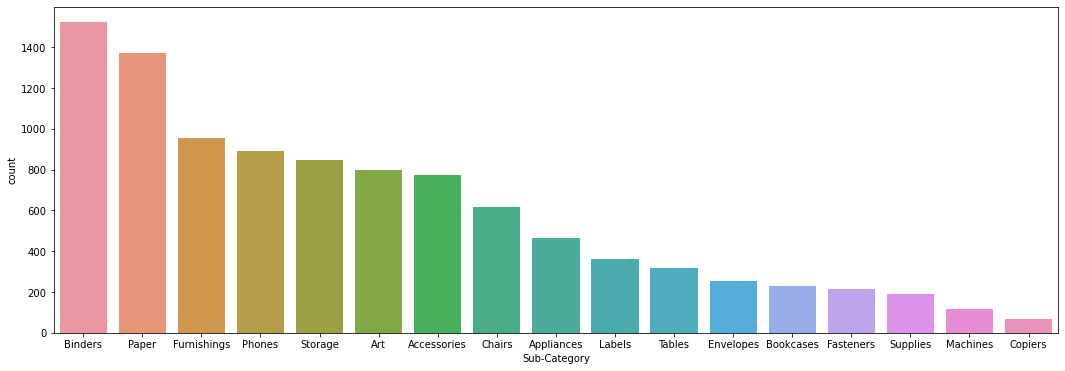

In [16]:
plt.figure(figsize=(18,6))
d4 =sns.countplot(x=df['Sub-Category'] , order=df['Sub-Category'].value_counts().index)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

<AxesSubplot:ylabel='Sub-Category'>

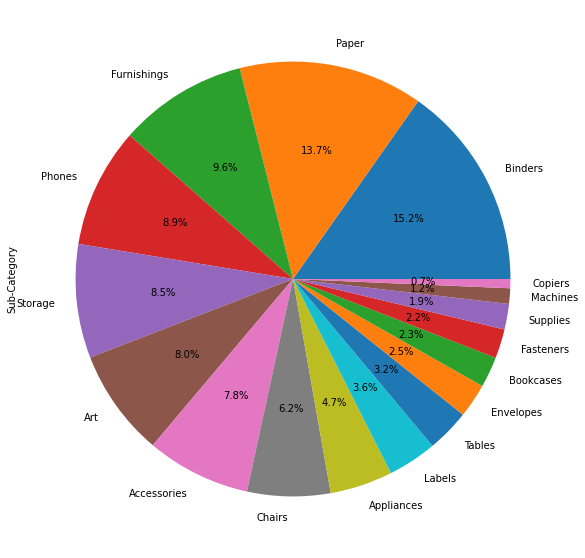

In [17]:
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

* The sales of Binders and papers are highest compared to all other sub-categories


In [18]:
def autopct_format(values): 
    def my_format(pct): 
        plt.rcParams['font.size'] = 12.0 
        plt.rcParams['font.weight'] = 6
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return f' ${val:d}'
    return my_format

Text(0, 0, 'Total Sales : \n$2297200')

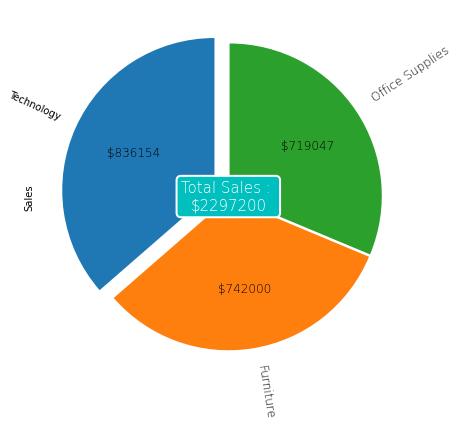

In [19]:
plt.figure(figsize=(7,7))
Top_category = df.groupby(["Category"])[['Sales']].sum().sort_values("Sales", ascending=False) 
total_revenue_category = '$' + str(int(Top_category["Sales"].sum()))
Top_category["Sales"].plot.pie(autopct = autopct_format(Top_category["Sales"]) , 
                               colors = sns.color_palette(),
                               explode = (0.1,0.01,0.01),
                               startangle = 90,
                               rotatelabels = True
                               
)
plt.text(0, 0, f'Total Sales : \n{total_revenue_category}',c='w',
         ha="center", va="center", size=15,
         bbox=dict(boxstyle="round, pad=0.3",fc="c", ec="w", lw=2))

* We can see that Category - Technology generated the highest revenue of about $836154
* The Total Revenue generated by all the categories - $2297200!

Text(0, 0, 'Total Sales : \n$2297200')

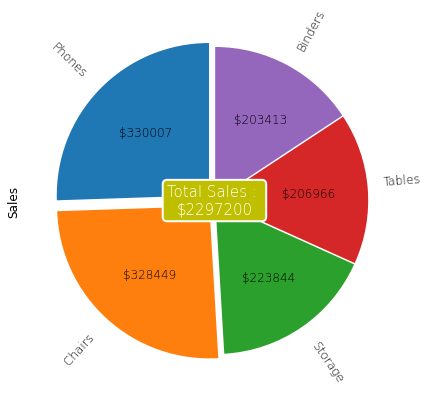

In [20]:
plt.figure(figsize=(7,7))
Top_sub_category = df.groupby(["Sub-Category"])[['Sales']].sum().sort_values("Sales", ascending=False) 
total_revenue_sub_category = '$' + str(int(Top_sub_category["Sales"].sum()))
Top_sub_category=Top_sub_category.head()
Top_sub_category["Sales"].plot.pie(autopct = autopct_format(Top_sub_category["Sales"]) , 
                               colors = sns.color_palette(),
                               explode = (0.05,0.05,0.01,0.01,0.01),
                               startangle = 90,
                               rotatelabels = True
                               
)


plt.text(
    0, 0, f'Total Sales : \n{total_revenue_sub_category}', c='w',
    ha="center", va="center", size=15,
    bbox=dict(boxstyle="round, pad=0.3",fc="y", ec="w", lw=2))

* We can see that Sub-Category - Phones(Technology) generated the highest revenue of about $330007

* The Total Revenue generated by all the categories - $2297200!

## Geographic Level Analysis

### State wise Sales


<AxesSubplot:xlabel='State', ylabel='Sales'>

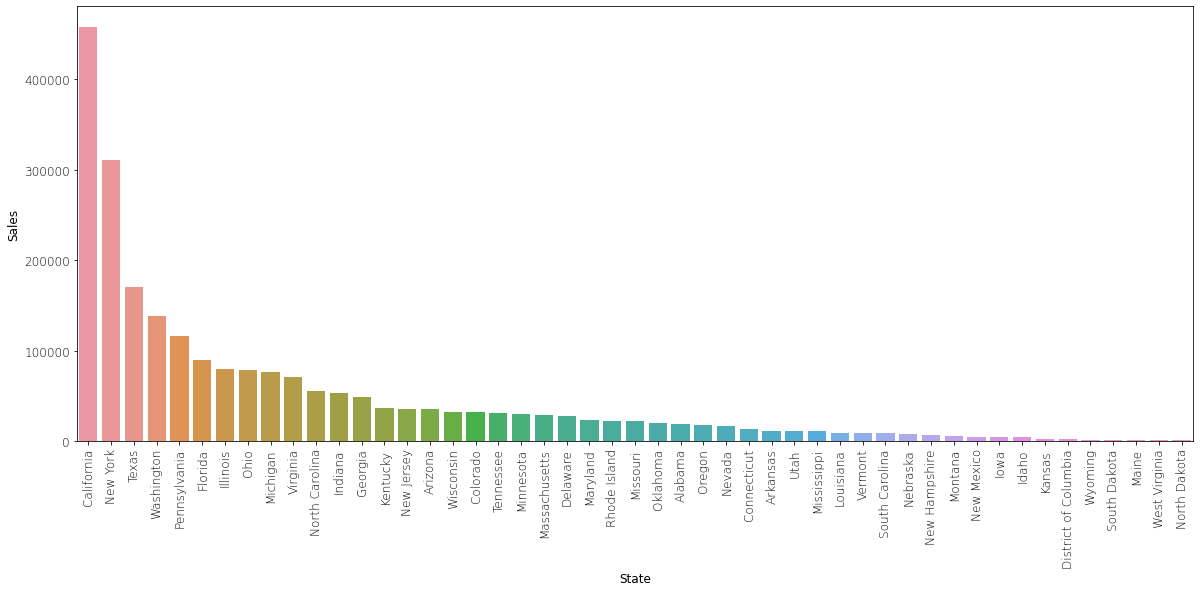

In [21]:
plt.figure(figsize=(20,8))
df_state= df.groupby(['State'])[['Sales']].sum().sort_values('Sales' , ascending=False)
df_state.reset_index(inplace = True)
plt.xticks(rotation=90)
sns.barplot(x='State' , y='Sales' , data=df_state)

* California and Newyork has highest sales followed by Texas
* Maine , West Virgina and North Dakota has lowest sales 

### State wise Profit


<AxesSubplot:xlabel='State', ylabel='Profit'>

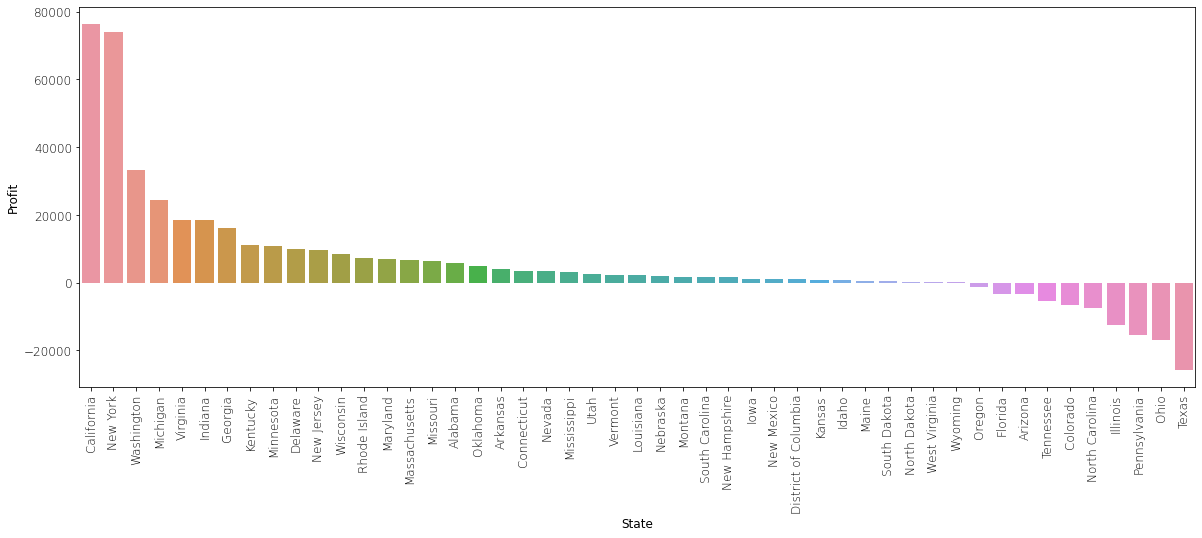

In [22]:
plt.figure(figsize=(20,7))
df_state = df.groupby(['State'])[['Profit']].sum().sort_values('Profit' , ascending=False)
df_state.reset_index(inplace = True)
plt.xticks(rotation =90)
sns.barplot(x='State' , y='Profit', data=df_state )

* California has highest profits as well as sales followed by New York. 
* In some states the profits are in negative.

### State wise Discount


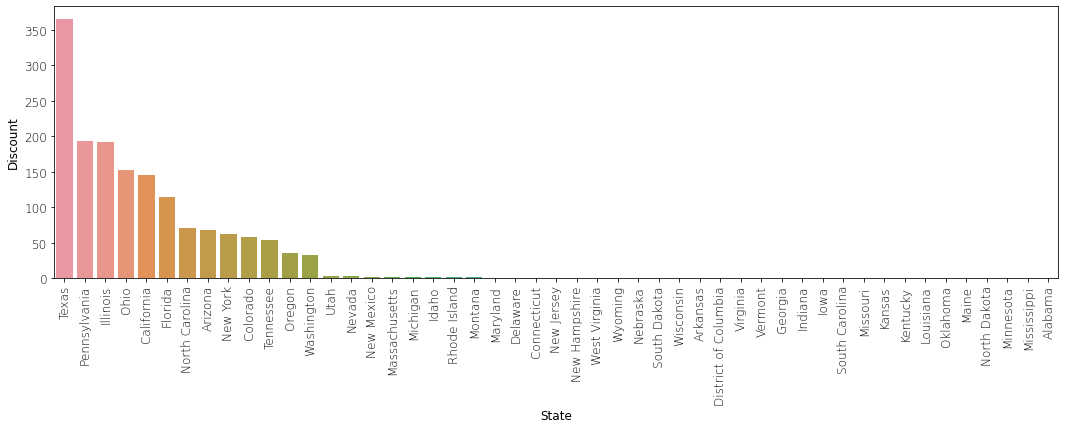

In [23]:
plt.figure(figsize=(18,5))
data_state= df.groupby(['State'])[['Discount']].sum().sort_values("Discount", ascending=False) 
data_state.reset_index(inplace=True)
plt.xticks(rotation=90)
sns.barplot(x='State', y='Discount', data = data_state)
plt.show()

* Maximum discount is provided in Texas where profits are in negative.
* Similar is happening with Ohio, illinous


### Analaysing States with Profit and Sales

<AxesSubplot:xlabel='State', ylabel='value'>

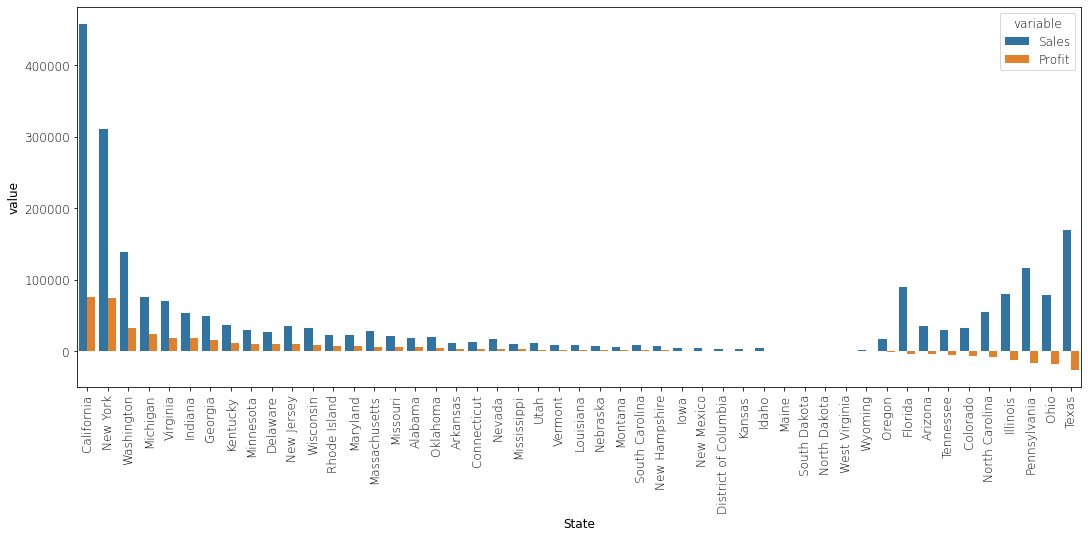

In [24]:
plt.figure(figsize=(18,7))
data_state= df.groupby(['State'])[['Sales', 'Profit']].sum().sort_values('Profit' , ascending=False)
data_state.reset_index(inplace = True)
data_state = data_state.melt('State')
plt.xticks(rotation=90)
sns.barplot(x='State', y='value', hue='variable', data=data_state)

* The relation between sales and profits is not always linear. 
* In some states, we can see the sales are at peak but the profits are not, And this may be because of the high Discount at these States.